In [2]:
import tensorflow as tf
from tensorflow import keras

In [4]:
keras.__version__

'2.8.0'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
import matplotlib.pyplot as plt

Text(0.5, 0, '9')

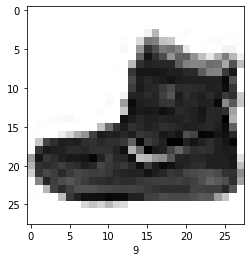

In [15]:
plt.imshow(X_train_full[0], cmap = 'binary')
plt.xlabel(y_train_full[0])

In [22]:
x_valid, x_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [25]:
layers_list = [keras.layers.Flatten(input_shape=[28,28]), 
               keras.layers.Dense(300, activation='relu'),
               keras.layers.Dense(200, activation='relu'),
               keras.layers.Dense(10, activation='softmax')]
model= keras.models.Sequential(layers_list)

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 297,710
Trainable params: 297,710
Non-trainable params: 0
_________________________________________________________________


In [27]:
weights,biases = model.layers[1].get_weights()

In [30]:
biases.shape

(300,)

In [31]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [32]:
history = model.fit(x_train, y_train, epochs=40,validation_data=(x_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 6s 2ms/step - loss: 0.7090 - accuracy: 0.7679 - val_loss: 0.5062 - val_accuracy: 0.8292
Epoch 2/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4868 - accuracy: 0.8314 - val_loss: 0.4623 - val_accuracy: 0.8396
Epoch 3/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4431 - accuracy: 0.8455 - val_loss: 0.4350 - val_accuracy: 0.8476
Epoch 4/40
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4142 - accuracy: 0.8551 - val_loss: 0.3936 - val_accuracy: 0.8670
Epoch 5/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3943 - accuracy: 0.8621 - val_loss: 0.4000 - val_accuracy: 0.8618
Epoch 6/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3781 - accuracy: 0.8651 - val_loss: 0.3731 - val_accuracy: 0.8676
Epoch 7/40
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3633 - accuracy: 0.8722 - val_loss: 0.3636 - val_accuracy:

In [35]:
# pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
# plt.show()

x_train.shape

(55000, 28, 28)

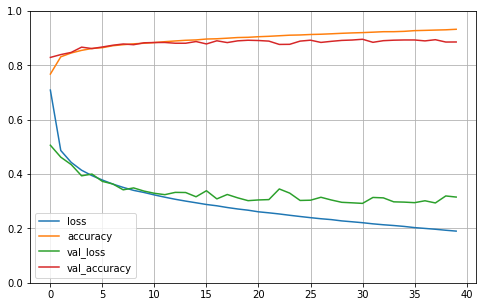

In [37]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()


In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 75.9314 - accuracy: 0.8408


[75.93143463134766, 0.8407999873161316]

In [46]:
x_new = X_test[:3]
y_new = model.predict(x_new)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [43]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [45]:
model.predict_classes(x_new)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [48]:
import numpy as np
y_new = np.argmax(y_new, axis =1)

In [49]:
y_new

array([9, 2, 1], dtype=int64)

In [50]:
np.array(class_names)[y_new]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

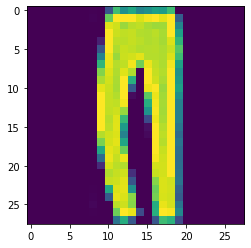

In [53]:
plt.imshow(x_new[2])